In [1]:
# ==============================
# Primera celda - Importaciones
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import joblib

sns.set(style='whitegrid')
print("Librerías cargadas correctamente.")


Librerías cargadas correctamente.


In [2]:
# ==============================
# Segunda celda - Carga de datos
# ==============================
datos = pd.read_csv("C:/RespaldoDB/beisbol.csv")
datos.head()


,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762


In [3]:
# ==============================
# Justificación del algoritmo
# ==============================
"""
Se utiliza RandomizedSearchCV con regresión logística porque:
- Permite explorar un gran espacio de hiperparámetros de forma aleatoria y más rápida que GridSearch.
- Es adecuado cuando el número de combinaciones posibles es muy grande.
- Optimiza el parámetro de regularización (C) y tipo de penalización (l1/l2).
- Proporciona un modelo interpretable para clasificación binaria de rendimiento de equipos.
"""


'\nSe utiliza RandomizedSearchCV con regresión logística porque:\n- Permite explorar un gran espacio de hiperparámetros de forma aleatoria y más rápida que GridSearch.\n- Es adecuado cuando el número de combinaciones posibles es muy grande.\n- Optimiza el parámetro de regularización (C) y tipo de penalización (l1/l2).\n- Proporciona un modelo interpretable para clasificación binaria de rendimiento de equipos.\n'

In [4]:
# ==============================
# Preprocesamiento
# ==============================
# Variables predictoras y objetivo
# Aquí definimos un ejemplo: clasificar si 'runs' es alto (>mediana) o bajo
mediana_runs = datos['runs'].median()
datos['runs_alto'] = (datos['runs'] > mediana_runs).astype(int)

X = datos[['bateos']]  # predictor(s)
y = datos['runs_alto'] # variable objetivo

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


In [5]:
# ==============================
# Diseño del modelo y RandomizedSearch
# ==============================
logreg = LogisticRegression(max_iter=1000, solver='liblinear')

# Espacio de hiperparámetros
param_dist = {
    'C': np.logspace(-3, 3, 50),  # regularización
    'penalty': ['l1', 'l2']
}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

random_search = RandomizedSearchCV(
    estimator=logreg,
    param_distributions=param_dist,
    n_iter=20,             # número de combinaciones aleatorias
    scoring='accuracy',
    cv=cv,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Mejores parámetros:", random_search.best_params_)
print("Mejor score validación cruzada:", random_search.best_score_)


Mejores parámetros: {'penalty': 'l2', 'C': np.float64(0.09102981779915217)}
Mejor score validación cruzada: 0.8033333333333333


Reporte clasificación - Regresión Logística (RandomizedSearchCV)
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.33      0.50         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6



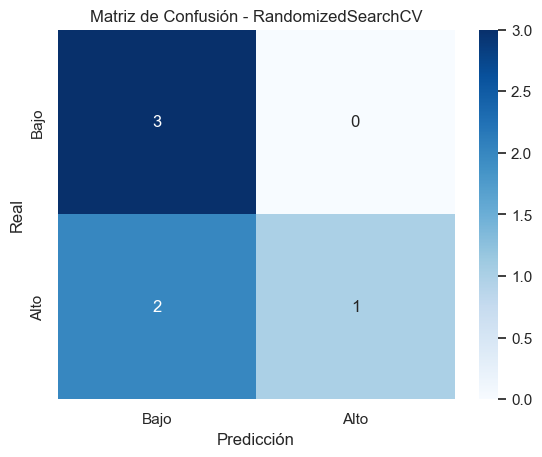

In [6]:
# ==============================
# Evaluación del modelo
# ==============================
y_pred = random_search.predict(X_test)

print("Reporte clasificación - Regresión Logística (RandomizedSearchCV)")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bajo','Alto'], yticklabels=['Bajo','Alto'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - RandomizedSearchCV")
plt.show()


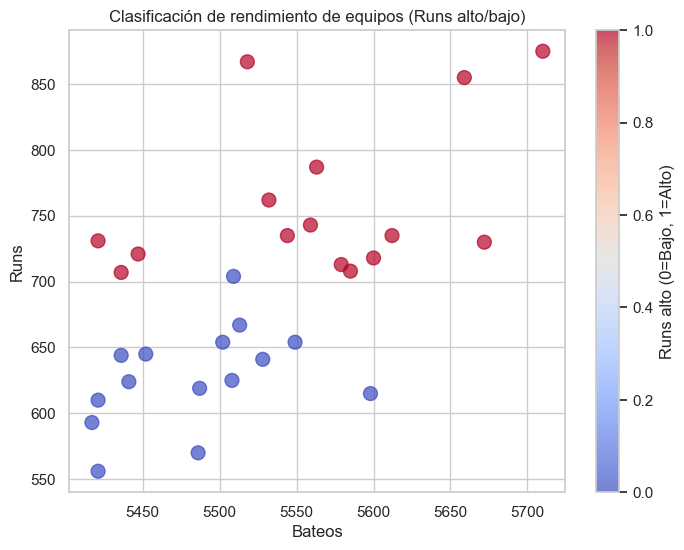

'\nInterpretación:\n---------------\n- Se puede ver cómo los equipos con mayor bateo tienden a generar más "runs".\n- La regresión logística optimizada permite predecir si un equipo estará por encima o debajo de la mediana.\n'

In [7]:
# ==============================
# Gráfica personalizada
# ==============================
plt.figure(figsize=(8,6))
plt.scatter(datos['bateos'], datos['runs'], c=datos['runs_alto'], cmap='coolwarm', s=100, alpha=0.7)
plt.xlabel('Bateos')
plt.ylabel('Runs')
plt.title('Clasificación de rendimiento de equipos (Runs alto/bajo)')
plt.colorbar(label='Runs alto (0=Bajo, 1=Alto)')
plt.show()

"""
Interpretación:
---------------
- Se puede ver cómo los equipos con mayor bateo tienden a generar más "runs".
- La regresión logística optimizada permite predecir si un equipo estará por encima o debajo de la mediana.
"""


In [8]:
# ==============================
# Guardar modelo y escalador
# ==============================
joblib.dump(random_search.best_estimator_, "modelo_logistica_random_beisbol.pkl")
joblib.dump(scaler, "scaler_beisbol.pkl")
print("Modelo y escalador guardados para repositorio.")


Modelo y escalador guardados para repositorio.
